# 包导入

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 数据导入

In [23]:
stone  = pd.read_excel("stone.xlsx")
print("护石:")
print(stone.head())
print("基本信息: ")
print(stone.info())

护石:
   等级      一技能  Lv    二技能  Lv1   孔  value
0   7  火属性攻击强化   1     不屈  1.0  21      2
1   6     昏厥耐性   2    击晕术  1.0  11      3
2   5      植生学   1  毒属性强化  2.0  11      1
3   6     风压耐性   1    击晕术  1.0  11      1
4   7       逆袭   2     利刃  1.0   1      4
基本信息: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   等级      1499 non-null   int64  
 1   一技能     1499 non-null   object 
 2   Lv      1499 non-null   int64  
 3   二技能     1341 non-null   object 
 4   Lv1     1341 non-null   float64
 5   孔       1499 non-null   int64  
 6   value   1499 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 82.1+ KB
None


In [24]:
skill = pd.read_excel("skill.xlsx")
print("技能:")
print(skill.head())
print(skill.info())

技能:
  LookUpName  MaxLevel
0         攻击         7
1        挑战者         5
2         无伤         3
3         怨恨         5
4       死里逃生         3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LookUpName  112 non-null    object
 1   MaxLevel    112 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB
None


# 数据预处理

In [25]:
# 处理缺失值
stone.fillna({"二技能":"无","Lv.1":0},inplace=True)

#处理技能,将技能名称用数字替换
skillArray = skill["LookUpName"].values
stone['一技能'].replace(skillArray,list(range(1,113)),inplace=True)
stone['二技能'].replace(skillArray,list(range(1,113)),inplace=True)
stone.head(10)

,等级,一技能,Lv,二技能,Lv1,孔,value
0,7,13,1,92,1.0,21,2
1,6,76,2,41,1.0,11,3
2,5,79,1,18,2.0,11,1
3,6,62,1,41,1.0,11,1
4,7,106,2,23,1.0,1,4
5,4,40,3,16,1.0,0,4
6,6,67,2,69,1.0,21,1
7,5,70,1,13,2.0,11,2
8,5,18,2,53,1.0,1,1
9,7,76,1,62,1.0,21,2


# 数据分析

查看各个value的护石的占比

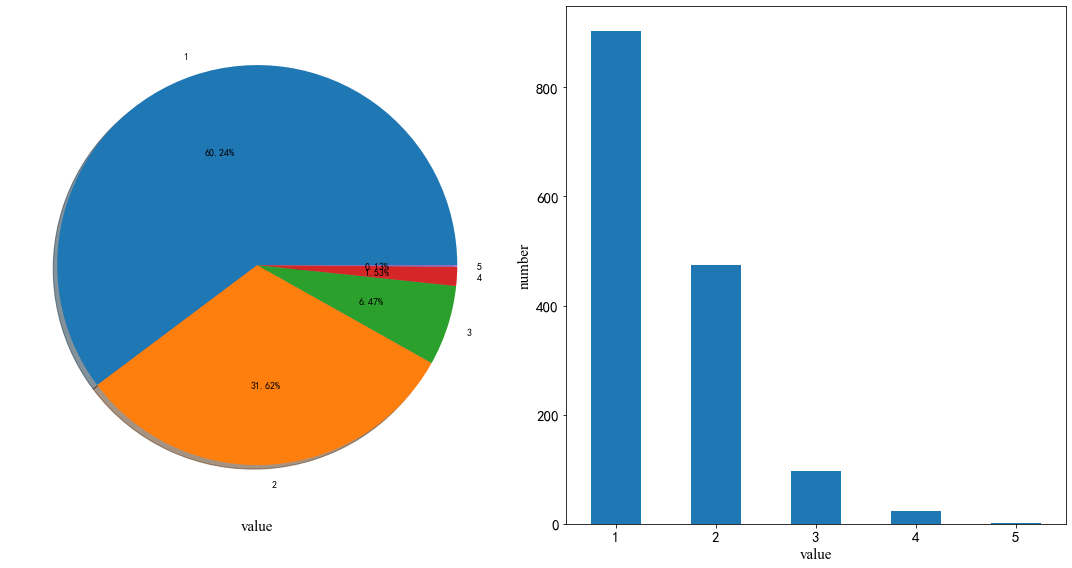

In [26]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 15,
}

#饼状图
fig,ax=plt.subplots(1,2,figsize=(15,8))
stone['value'].value_counts().plot.pie(ax=ax[0],shadow=True,autopct='%.2f%%')
ax[0].set_ylabel('')
ax[0].set_xlabel('value',font1)
#柱状图
stone['value'].value_counts().plot.bar(ax=ax[1])
ax[1].set_ylabel('number',font1)
ax[1].set_xlabel('value',font1)
#设置相关信息
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

每种等级的数量

7    476
5    421
6    326
4    194
3     82
Name: 等级, dtype: int64


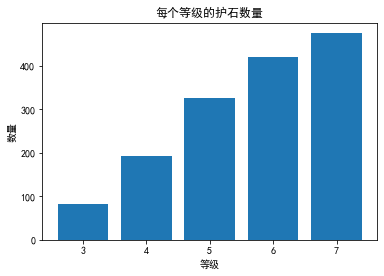

In [27]:
#每种等级的数量
lv_value = stone["等级"].value_counts()
print(lv_value)
plt.bar(stone["等级"].unique(),lv_value)
plt.xlabel("等级")
plt.ylabel("数量")
plt.title("每个等级的护石数量")
plt.show()

等级与value的关系

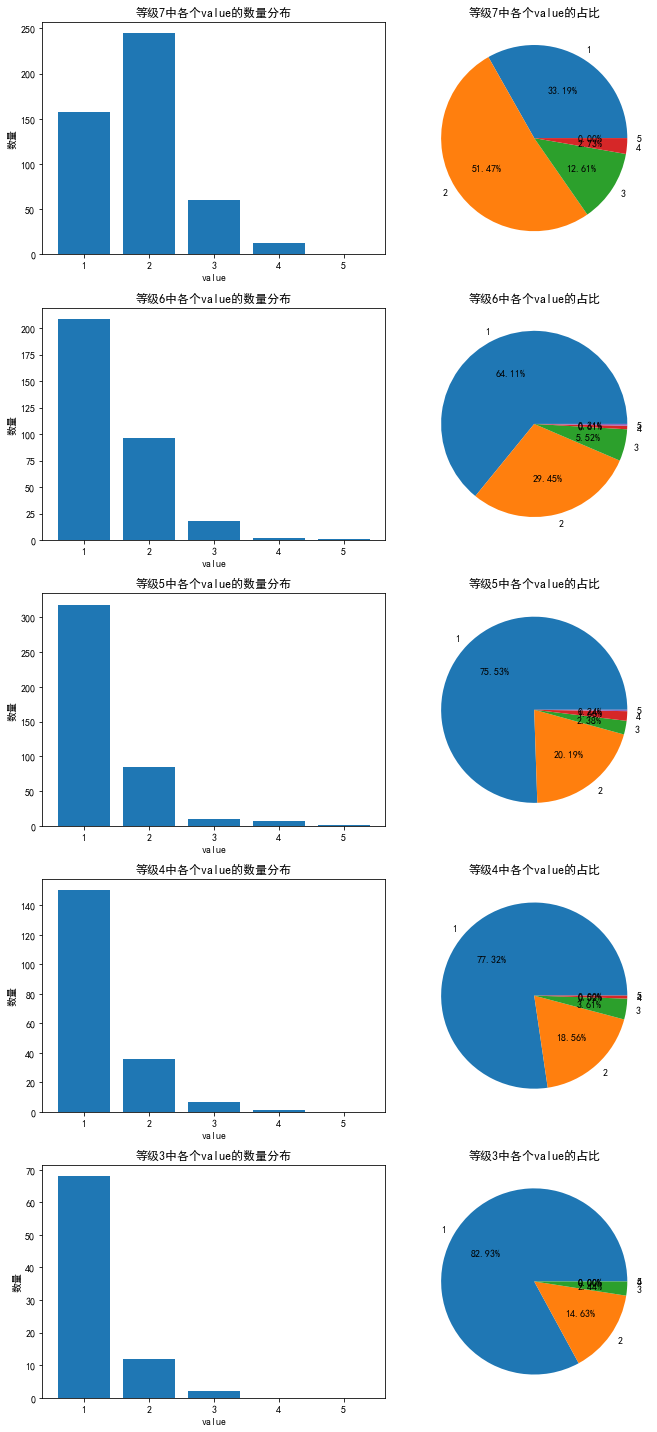

In [28]:
#等级的列表,value的列表
lvList = stone["等级"].unique()
valueList = [1,2,3,4,5]
#绘制
fig,ax= plt.subplots(nrows=5, ncols=2, figsize = (10,20))
num = 0
for i in lvList:
    valueConut = []
    for j in valueList:
        temp = stone[(stone["等级"]==i) & (stone["value"]==j)]
        tempCount = temp["value"].count()
        valueConut.append(tempCount)
    ax[num,0].bar(valueList,valueConut)
    ax[num,0].set_xlabel('value'); 
    ax[num,0].set_ylabel('数量'); 
    ax[num,0].set_title("等级"+str(i)+"中各个value的数量分布")

    ax[num,1].pie(valueConut,labels = valueList,autopct='%.2f%%',labeldistance=1.1)
    ax[num,1].set_title("等级"+str(i)+"中各个value的占比")
    # print(valueConut)
    num+=1

plt.tight_layout()
plt.show()

value与技能的关系

In [29]:
stone[['一技能']].describe()

,一技能
count,1499.000000
mean,57.216144
std,29.227481
min,1.000000
25%,35.000000
50%,61.000000
75%,78.000000
max,108.000000


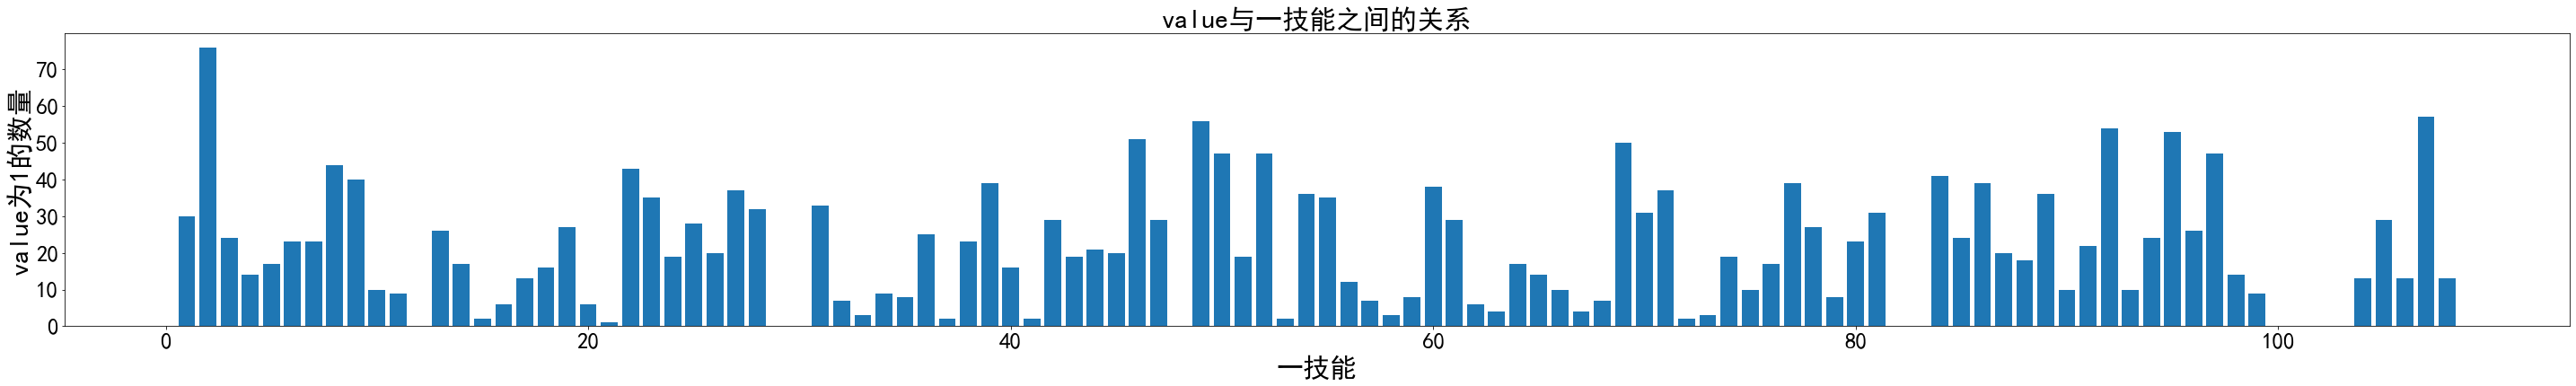

In [30]:
stone.groupby('一技能')['value'].sum()
plt.figure(figsize = (50,6))
plt.bar(stone["一技能"].unique(),stone.groupby('一技能')['value'].sum())
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
plt.title("value与一技能之间的关系",fontsize = 30)
plt.xlabel("一技能",fontsize = 30)
plt.ylabel("value为1的数量",fontsize = 30)
plt.show()

In [31]:
stone[['二技能']].describe()

,二技能
count,1499.000000
mean,61.923949
std,32.414655
min,1.000000
25%,39.000000
50%,63.000000
75%,89.000000
max,112.000000


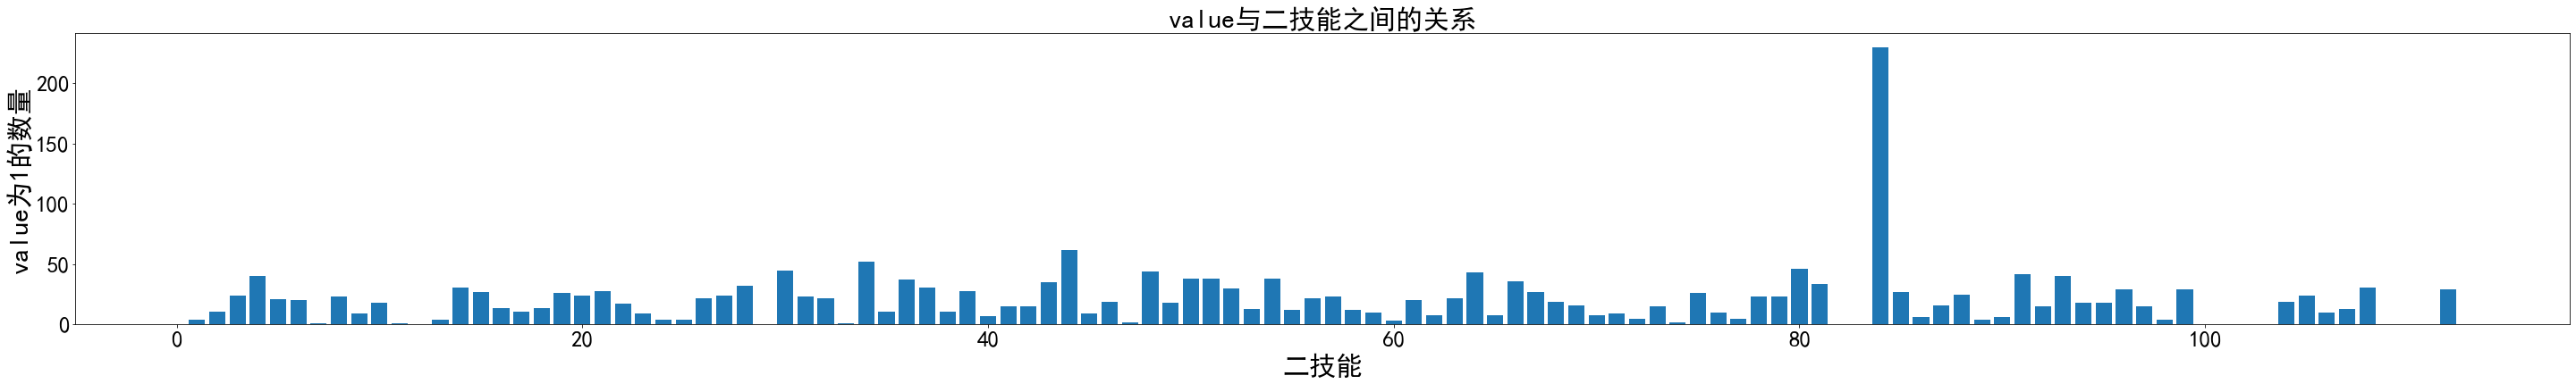

In [32]:
stone.groupby('二技能')['value'].sum()
plt.figure(figsize = (50,6))
plt.bar(stone["二技能"].unique(),stone.groupby('二技能')['value'].sum())
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
plt.title("value与二技能之间的关系",fontsize = 30)
plt.xlabel("二技能",fontsize = 30)
plt.ylabel("value为1的数量",fontsize = 30)
plt.show()

孔与value的关系

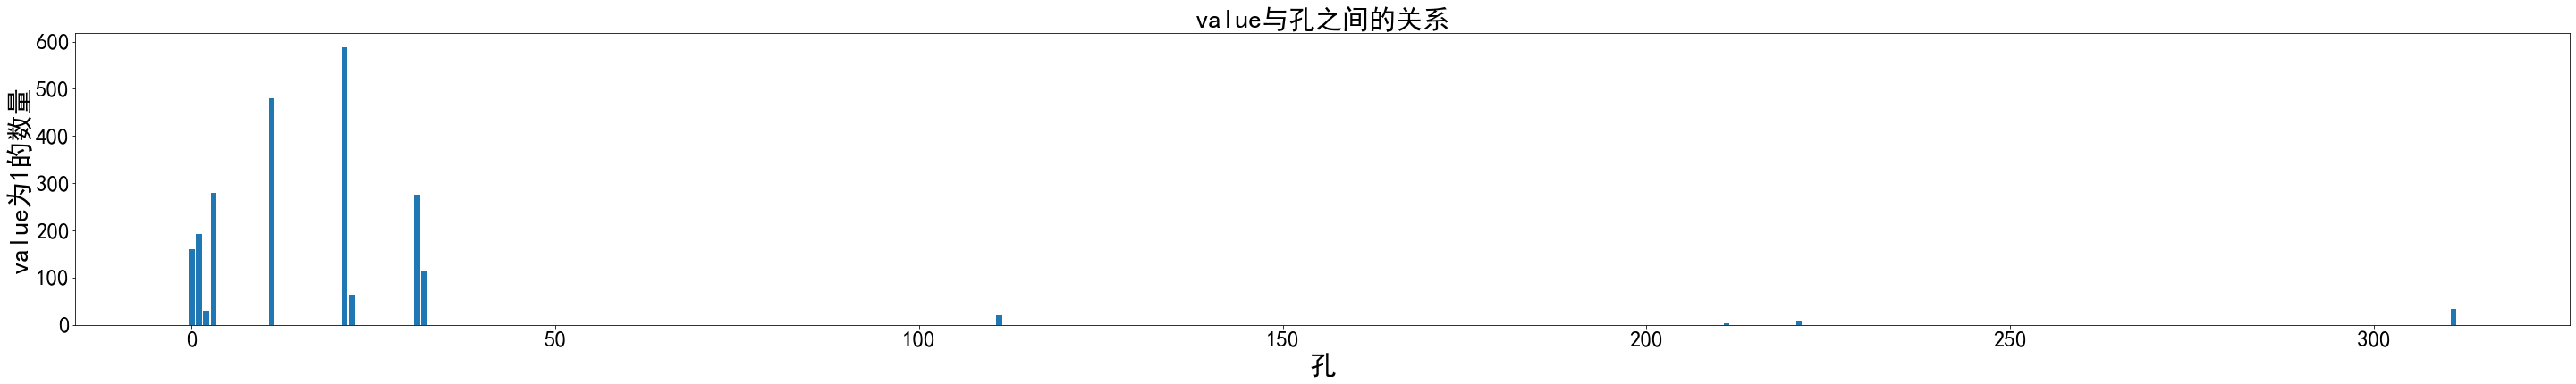

In [33]:
stone.groupby('孔')['value'].sum()
plt.figure(figsize = (50,6))
plt.bar(stone["孔"].unique(),stone.groupby('孔')['value'].sum())
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
plt.title("value与孔之间的关系",fontsize = 30)
plt.xlabel("孔",fontsize = 30)
plt.ylabel("value为1的数量",fontsize = 30)
plt.show()

# 降维 

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

lda = LDA(n_components=1)
pca = PCA(n_components=1)
skill1=stone[['一技能','Lv']]
re_1=lda.fit_transform(skill1,stone['一技能'])
skill2=stone[['二技能','Lv1']]
re_2=lda.fit_transform(skill1,stone['二技能'])
skill=np.concatenate((re_1,re_2),axis=1)
re_skill=pca.fit_transform(skill)
stone=pd.concat((stone,pd.DataFrame(re_skill,columns=['temp'])),axis = 1)
stone.drop(['一技能', 'Lv','二技能','Lv1'], axis=1,inplace=True)
stone

,等级,孔,value,temp
0,7,21,2,-1.848808
1,6,11,3,1.505373
2,5,11,1,-0.289074
3,6,11,1,-0.690824
4,7,1,4,2.214343
...,...,...,...,...
1494,5,11,1,-0.738088
1495,5,0,1,-1.068941
1496,7,31,2,-0.147280
1497,4,1,3,2.167078


# 归一化

In [36]:
from sklearn.preprocessing import StandardScaler

kong=stone['孔'].values.reshape(-1,1)
temp=stone['temp'].values.reshape(-1,1)
rank=stone['等级'].values.reshape(-1,1)

scaler = StandardScaler(copy=False)
stone['孔']=scaler.fit_transform(kong)
stone['temp']=scaler.fit_transform(temp)
stone['等级']=scaler.fit_transform(rank)
stone

,等级,孔,value,temp
0,1.147585,0.352653,2,-1.468677
1,0.319755,0.012831,3,1.195855
2,-0.508074,0.012831,1,-0.229638
3,0.319755,0.012831,1,-0.548784
4,1.147585,-0.326990,4,1.759054
...,...,...,...,...
1494,-0.508074,0.012831,1,-0.586331
1495,-0.508074,-0.360972,1,-0.849157
1496,1.147585,0.692474,2,-0.116998
1497,-1.335904,-0.326990,3,1.721508


## 包导入和训练数据的处理

In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

target = 'value'
x_columns=[x for x in stone.columns if x not in [target]]
X = stone[x_columns]
Y = stone['value']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((899, 3), (899,), (600, 3), (600,))

# 预测模型 rbf svm

In [38]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(x_train,y_train)
prediction1=model.predict(x_test)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is 0.6366666666666667


# 预测模型 Linear svm

In [39]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(x_train,y_train)
prediction2=model.predict(x_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test))

Accuracy for linear SVM is 0.6066666666666667


## 预测模型 Logistic Regression

In [40]:
model = LogisticRegression()
model.fit(x_train,y_train)
prediction3=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.6333333333333333


## 预测模型 DecisionTree Classifier

In [41]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction4=model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.6616666666666666


## 预测模型 KNeighborsClassifier

In [42]:
model=KNeighborsClassifier() 
model.fit(x_train,y_train)
prediction5=model.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.6683333333333333


# 预测模型 KNN

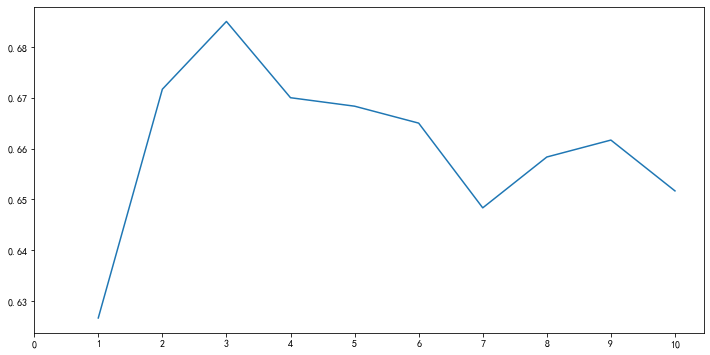

Accuracies for different values of n are: [0.62666667 0.67166667 0.685      0.67       0.66833333 0.665
 0.64833333 0.65833333 0.66166667 0.65166667] 
with the max value as  0.685


In [46]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'\nwith the max value as ',a.values.max())

## 预测模型 高斯

In [47]:
model=GaussianNB()
model.fit(x_train,y_train)
prediction6=model.predict(x_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.6433333333333333


## 预测模型 随机森林

In [48]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prediction7=model.predict(x_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))

The accuracy of the Random Forests is 0.6583333333333333


## Cross Validation

In [49]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
# from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.626474,0.052518
Radial Svm,0.672483,0.053271
Logistic Regression,0.669803,0.049770
KNN,0.687150,0.039650
Decision Tree,0.660416,0.054685
Naive Bayes,0.638434,0.047897
Random Forest,0.657776,0.047578


<AxesSubplot:>

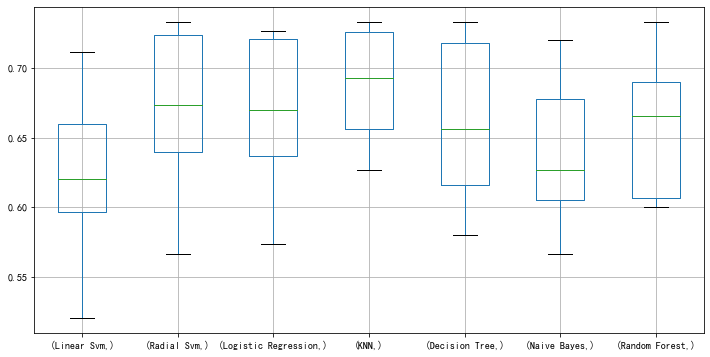

In [50]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

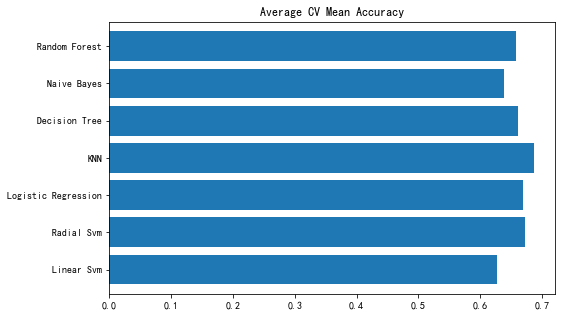

In [51]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

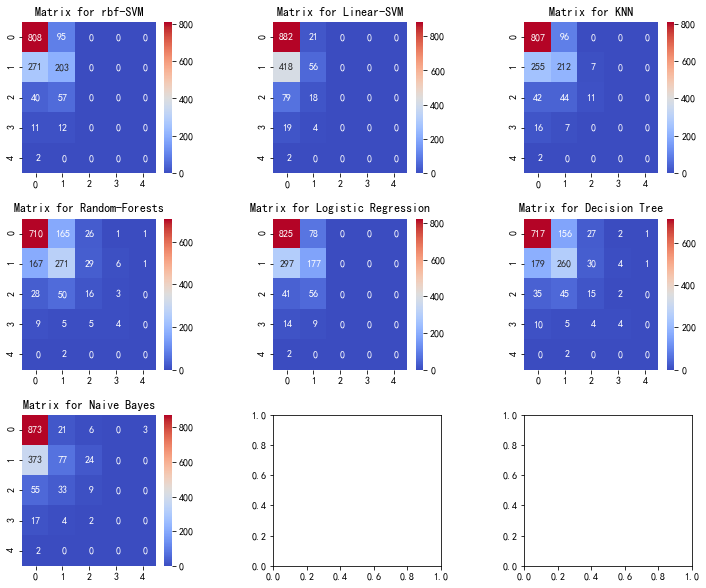

In [52]:
from sklearn.model_selection import cross_val_predict
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f',cmap='coolwarm')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f',cmap='coolwarm')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f',cmap='coolwarm')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f',cmap='coolwarm')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.3,wspace=0.5)
plt.show()